## Linear Regression using Scikit Learn 
## Supervised Learning    
### By Praveen Shahani
#### Problem Statement- Predict the percentage of a student based on the no. of study hours.

In [1]:
##Importing the needful libraries
import pandas as pd     #library for working with data
import numpy as np      #library for numerical computation
import matplotlib.pyplot as plt    #library for plotting
import seaborn as sns   #library for visualization
#sklearn(scikit-learn) for applying machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the data
data=pd.read_csv(r"C:\Users\Praveen Shahani\Downloads\student_scores - student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
## Checking if the data has null value or not
data.isnull==True

False

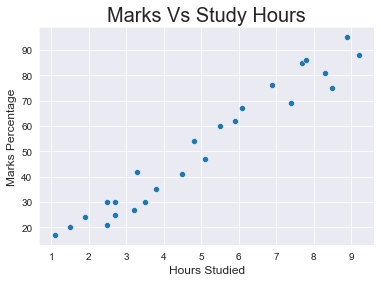

In [5]:
# Experimenting what the numerical values trying to convey through plots
sns.set_style('darkgrid')
sns.scatterplot(y = data['Scores'],x = data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
# the plot gives the degree of correlation which is positive and conveying the direct relation 

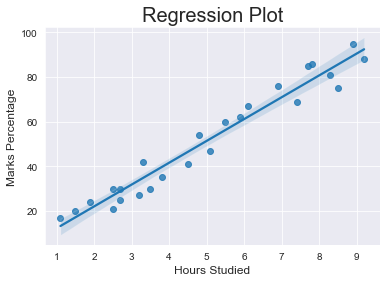

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
# Introducing a regression line 
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In [7]:
# Applying Cross validation-> splitting into training and test set
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


In [8]:
#Curve fitting of training sets with the help of regression lines
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


In [9]:
# Extrapolating the given training set and finding out what it conveys
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [10]:
# Comparing it with the test set to check the accuracy
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


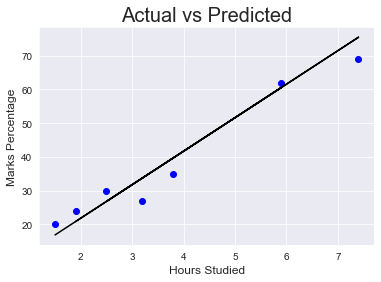

In [11]:
# Comparing the plot to see the difference between the actual and predicted numerical values
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [12]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


In [22]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
